<a href="https://colab.research.google.com/github/kridtapon/Algotrade/blob/main/8_Volume_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


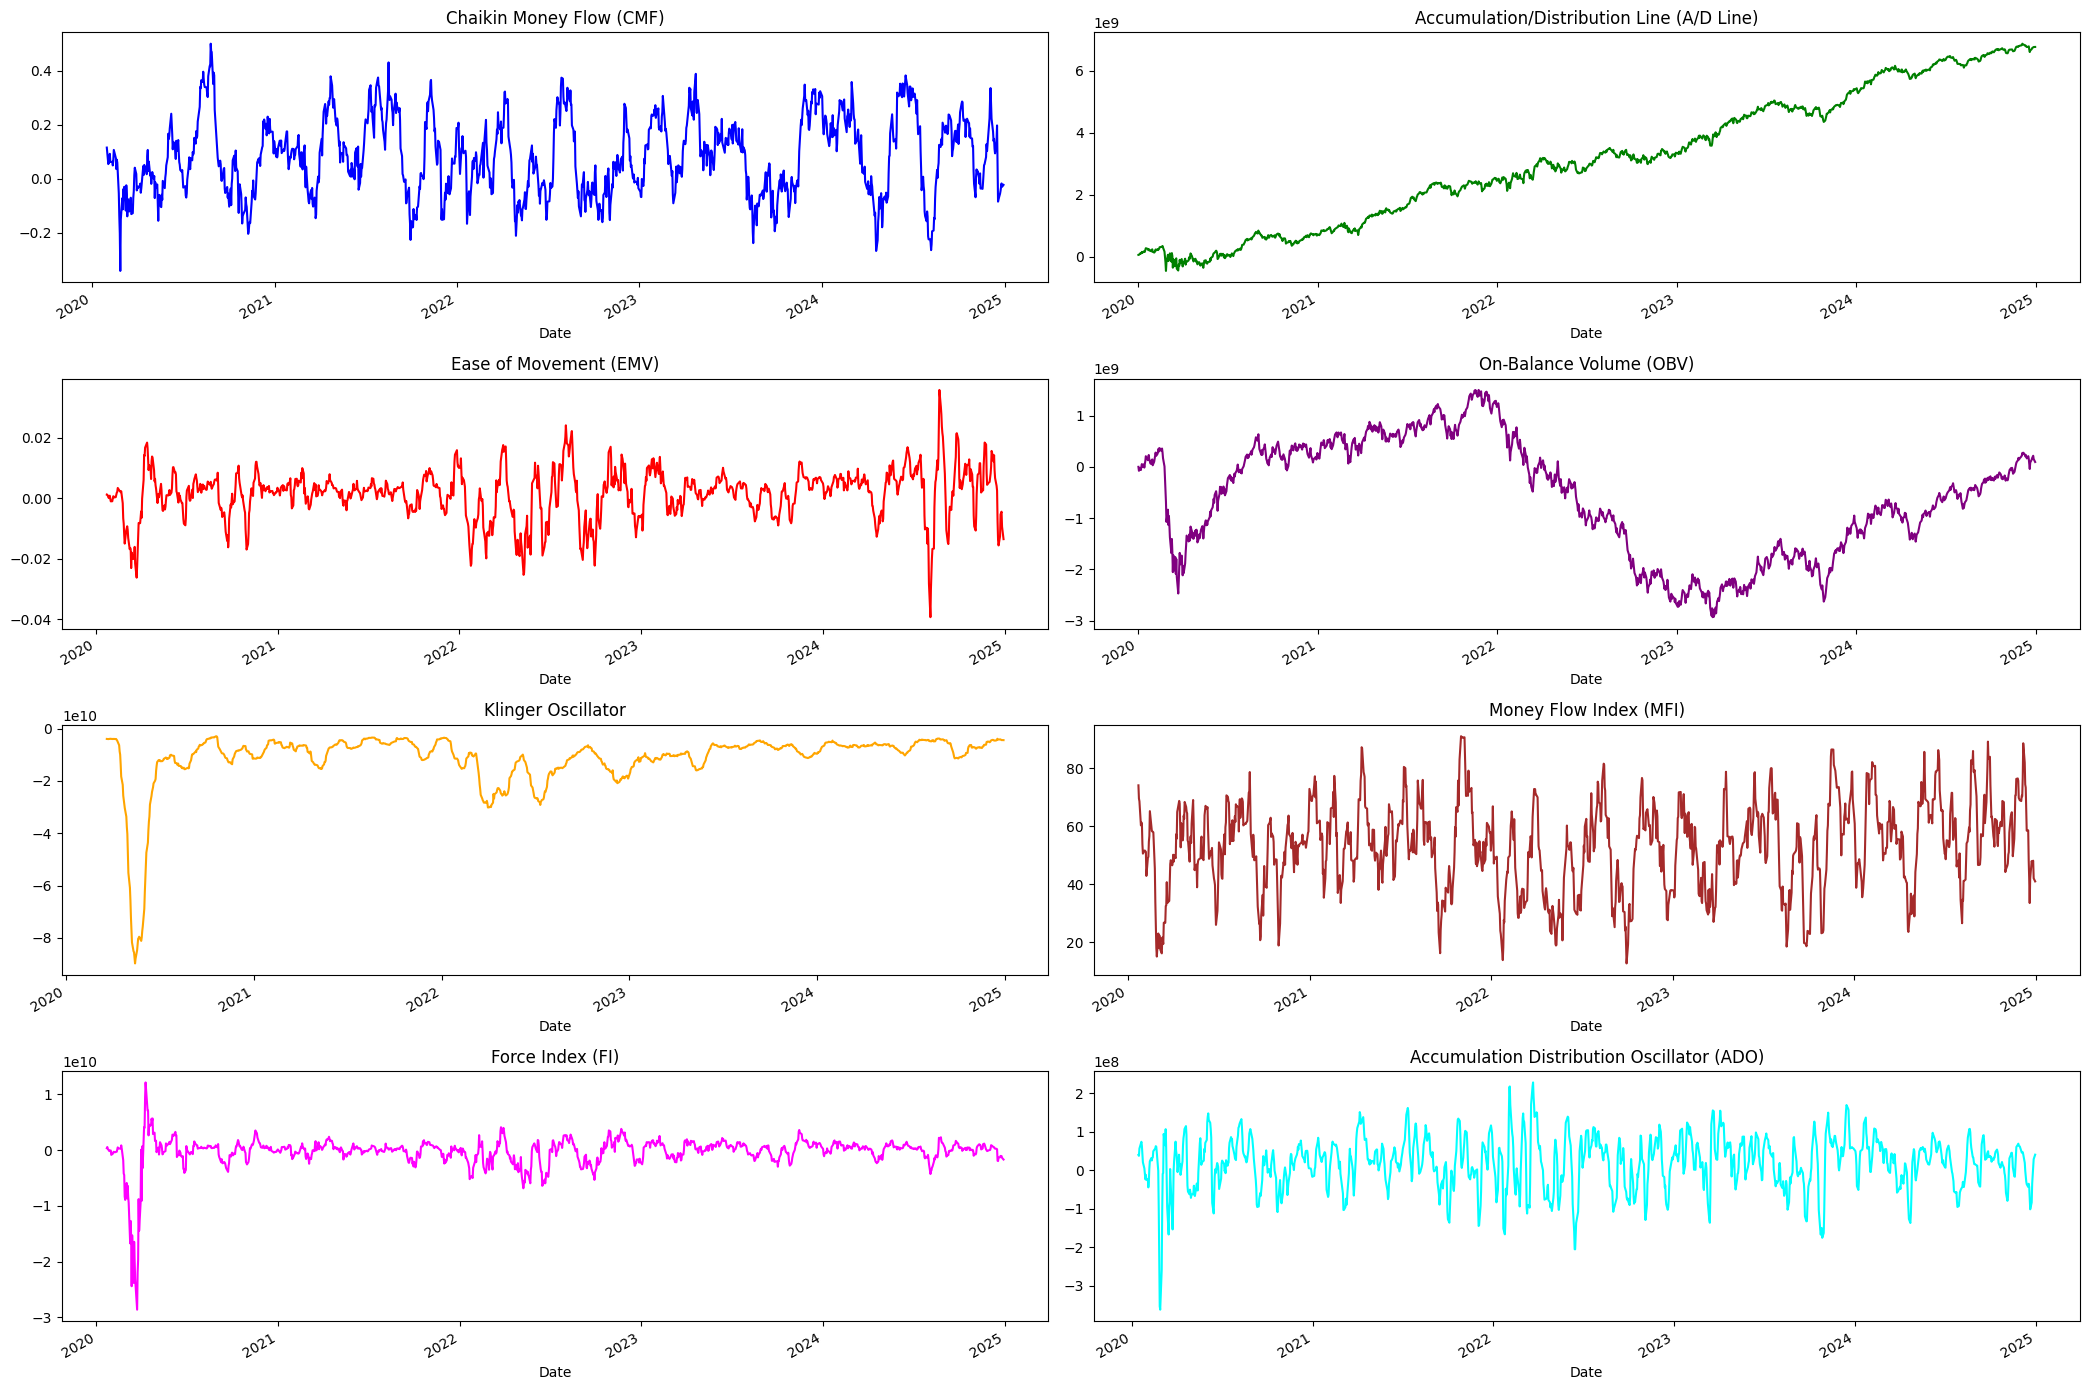

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define the stock symbol and time period
symbol = 'SPY'
start_date = '2020-01-01'
end_date = '2024-12-31'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# --- 1. Chaikin Money Flow (CMF) ---
def chaikin_money_flow(df, period=21):
    df['Money Flow Multiplier'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    df['Money Flow Volume'] = df['Money Flow Multiplier'] * df['Volume']
    cmf = df['Money Flow Volume'].rolling(window=period).sum() / df['Volume'].rolling(window=period).sum()
    return cmf

df['CMF'] = chaikin_money_flow(df)

# --- 2. Accumulation/Distribution Line (A/D Line) ---
def accumulation_distribution(df):
    df['ADL'] = (((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])) * df['Volume']
    df['ADL'] = df['ADL'].cumsum()
    return df['ADL']

df['ADL'] = accumulation_distribution(df)

# --- 3. Ease of Movement (EMV) ---
def ease_of_movement(df, period=14):
    df['Distance'] = (df['High'] + df['Low']) / 2 - (df['High'].shift(1) + df['Low'].shift(1)) / 2
    df['Box Ratio'] = (df['Volume'] / 100000) / (df['High'] - df['Low'])
    df['EMV'] = df['Distance'] / df['Box Ratio']
    df['EMV'] = df['EMV'].rolling(window=period).mean()
    return df['EMV']

df['EMV'] = ease_of_movement(df)

# --- 4. On-Balance Volume (OBV) ---
def on_balance_volume(df):
    df['OBV'] = np.where(df['Close'] > df['Close'].shift(1), df['Volume'],
                         np.where(df['Close'] < df['Close'].shift(1), -df['Volume'], 0))
    df['OBV'] = df['OBV'].cumsum()
    return df['OBV']

df['OBV'] = on_balance_volume(df)

# --- 5. Klinger Oscillator ---
def klinger_oscillator(df, fast=34, slow=55):
    df['Klinger'] = (df['High'] - df['Low']) * df['Volume']
    df['Klinger'] = df['Klinger'].rolling(window=fast).sum() - df['Klinger'].rolling(window=slow).sum()
    return df['Klinger']

df['Klinger'] = klinger_oscillator(df)

# --- 6. Money Flow Index (MFI) ---
def money_flow_index(df, period=14):
    df['Typical Price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Money Flow'] = df['Typical Price'] * df['Volume']
    df['Money Flow Positive'] = np.where(df['Typical Price'] > df['Typical Price'].shift(1), df['Money Flow'], 0)
    df['Money Flow Negative'] = np.where(df['Typical Price'] < df['Typical Price'].shift(1), df['Money Flow'], 0)
    df['MFI'] = 100 - (100 / (1 + (df['Money Flow Positive'].rolling(window=period).sum() /
                                    df['Money Flow Negative'].rolling(window=period).sum())))
    return df['MFI']

df['MFI'] = money_flow_index(df)

# --- 7. Force Index (FI) ---
def force_index(df, period=13):
    df['FI'] = (df['Close'] - df['Close'].shift(1)) * df['Volume']
    df['FI'] = df['FI'].rolling(window=period).sum()
    return df['FI']

df['FI'] = force_index(df)

# --- 8. Accumulation Distribution Oscillator (ADO) ---
def accumulation_distribution_oscillator(df, fast=3, slow=10):
    df['AD Oscillator'] = df['ADL'].rolling(window=fast).mean() - df['ADL'].rolling(window=slow).mean()
    return df['AD Oscillator']

df['ADO'] = accumulation_distribution_oscillator(df)

# --- Plotting ---
def plot_indicators(df):
    plt.figure(figsize=(21, 14))

    # Plot all 8 indicators in a single figure (including Force Index)
    plt.subplot(4, 2, 1)
    df['CMF'].plot(title='Chaikin Money Flow (CMF)', color='blue')

    plt.subplot(4, 2, 2)
    df['ADL'].plot(title='Accumulation/Distribution Line (A/D Line)', color='green')

    plt.subplot(4, 2, 3)
    df['EMV'].plot(title='Ease of Movement (EMV)', color='red')

    plt.subplot(4, 2, 4)
    df['OBV'].plot(title='On-Balance Volume (OBV)', color='purple')

    plt.subplot(4, 2, 5)
    df['Klinger'].plot(title='Klinger Oscillator', color='orange')

    plt.subplot(4, 2, 6)
    df['MFI'].plot(title='Money Flow Index (MFI)', color='brown')

    plt.subplot(4, 2, 7)
    df['FI'].plot(title='Force Index (FI)', color='magenta')

    plt.subplot(4, 2, 8)
    df['ADO'].plot(title='Accumulation Distribution Oscillator (ADO)', color='cyan')

    plt.tight_layout()
    plt.show()

# Plot the indicators on the same image
plot_indicators(df)